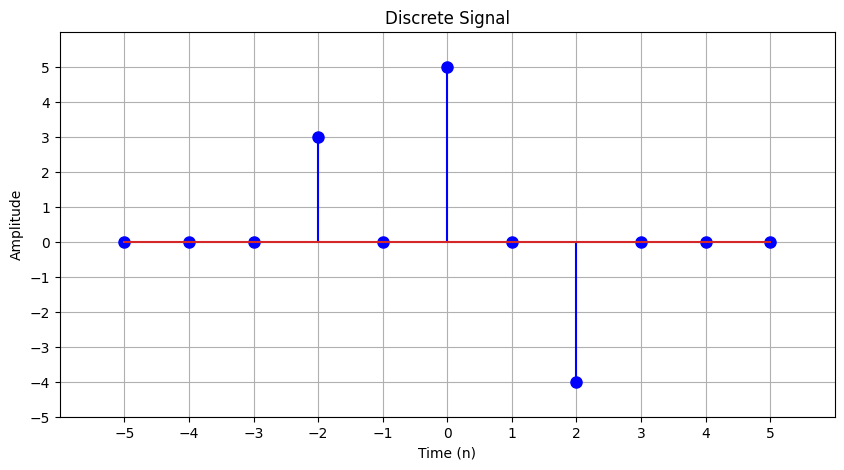

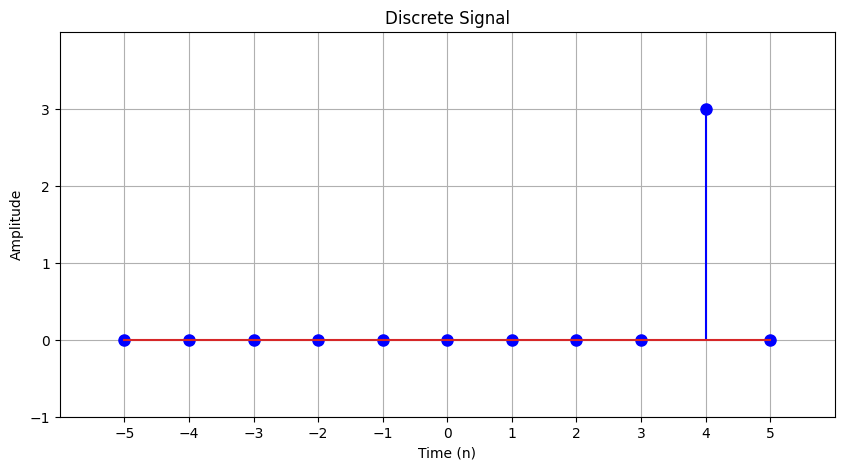

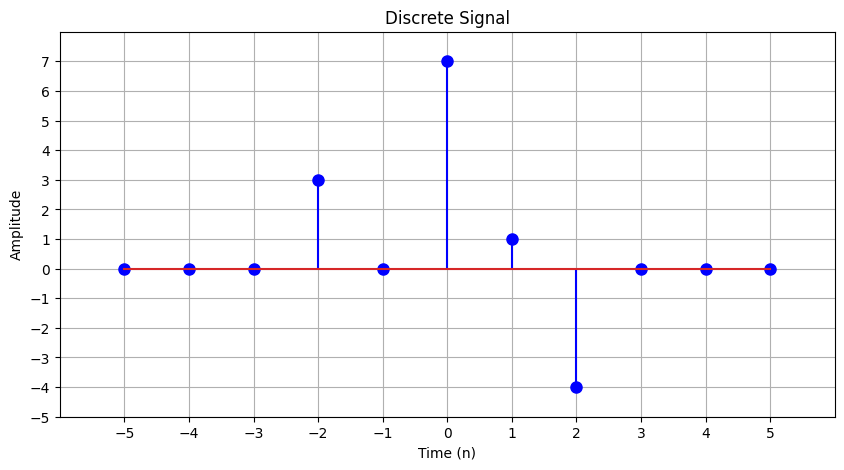

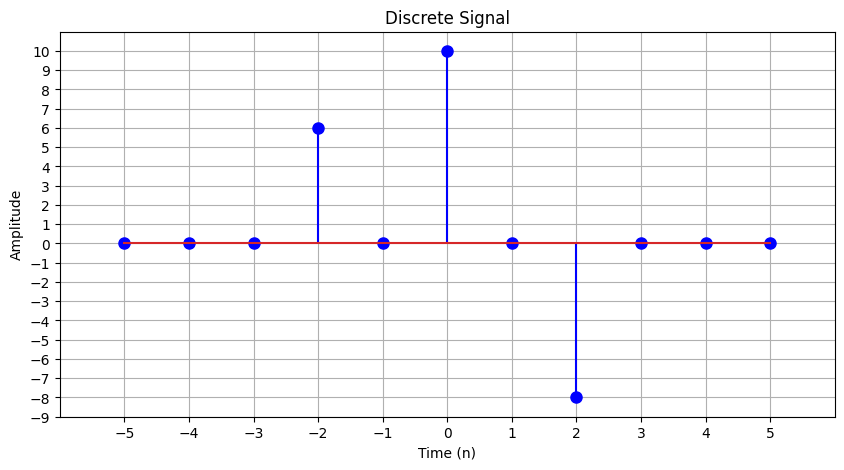

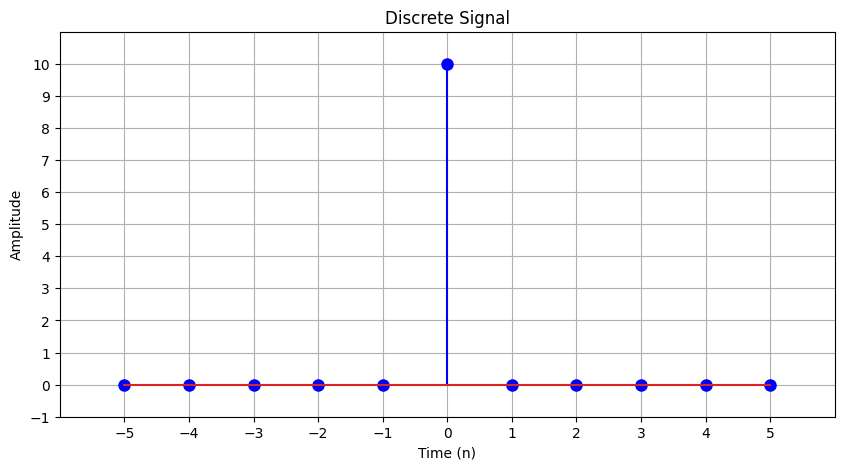

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class DiscreteSignal:
    def __init__(self, INF):
        self.INF=INF
        self.values= np.zeros(2*INF + 1)
        
    def set_value_at_time(self, time, value):
        if time>self.INF or time<-self.INF:
            print("Input Out Of Bound!")
        else:    
            self.values[time+self.INF]=value
            
    def shift_signal(self, shift):    
        new_signal = DiscreteSignal(self.INF) 
        new_signal.values= np.roll(self.values, shift)   
        if shift > 0:
            new_signal.values[:shift] = 0
        elif shift < 0:
            new_signal.values[shift:] = 0
        return new_signal
    
    def add(self, other):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= other.values+self.values
        return new_signal
    
    def multiply(self, other):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= other.values*self.values
        return new_signal
    
    def multiply_const_factor(self, scaler):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values= scaler*self.values
        return new_signal
    
    def plot(self):
        time = np.arange(-self.INF, self.INF + 1)
    
        plt.figure(figsize=(10, 5))
    
        markerline, stemlines, baseline = plt.stem(time, self.values)
    
        plt.setp(markerline, markersize=8, color='blue')
        plt.setp(stemlines, color='blue', linewidth=1.5)
        plt.setp(baseline, visible=True)  

        plt.xlim([-self.INF - 1, self.INF + 1])
        plt.ylim([min(self.values) - 1, max(self.values) + 1])

        plt.xticks(np.arange(-self.INF, self.INF + 1, 1))
        plt.yticks(np.arange(min(self.values) - 1, max(self.values) + 1))

        plt.grid(True)

        plt.title('Discrete Signal')
        plt.xlabel('Time (n)')
        plt.ylabel('Amplitude')

        plt.show()

    
signal = DiscreteSignal(INF=5)

# Set values at specific times
signal.set_value_at_time(-2, 3)
signal.set_value_at_time(0, 5)
signal.set_value_at_time(2, -4)

# Shift the signal by +1
shifted_signal = signal.shift_signal(6)

# # Plot the original and shifted signals
signal.plot()
shifted_signal.plot()


# # Create another signal and add it to the first
signal2 = DiscreteSignal(INF=5)
signal2.set_value_at_time(0, 2)
signal2.set_value_at_time(1, 1)

# Add signals
added_signal = signal.add(signal2)
added_signal.plot()

# Multiply by a constant
scaled_signal = signal.multiply_const_factor(2)
scaled_signal.plot()

# Multiply two signals element-wise
multiplied_signal = signal.multiply(signal2)
multiplied_signal.plot()

